In [3]:
import pandas as pd
import numpy as np

In [17]:
import os
os.getcwd()

'C:\\Users\\Yannick\\Documents\\CoursENSAE\\Statapp\\stat_app_foot'

In [19]:
df_16=pd.read_csv("C:\\Users\\Yannick\\Documents\\CoursENSAE\\Statapp\\F1_1617.csv")
df_15=pd.read_csv("C:\\Users\\Yannick\\Documents\\CoursENSAE\\Statapp\\F1_1516.csv")
df_14=pd.read_csv("C:\\Users\\Yannick\\Documents\\CoursENSAE\\Statapp\\F1_1415.csv")

df_15=df_15.drop(380)

In [20]:
print(df_16.shape)
print(df_16.columns)

(120, 64)
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


In [21]:
df_16.head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,F1,12/08/16,Bastia,Paris SG,0,1,A,0,0,D,...,1.95,32,1.50,1.93,1.86,2.03,1.97,12.13,5.29,1.34
1,F1,12/08/16,Monaco,Guingamp,2,2,D,0,2,A,...,1.75,31,-1.00,2.28,2.20,1.75,1.69,1.71,3.75,5.87
2,F1,13/08/16,Bordeaux,St Etienne,3,2,H,1,0,H,...,1.53,27,-0.25,2.12,2.07,1.83,1.79,2.39,3.04,3.66
3,F1,13/08/16,Caen,Lorient,3,2,H,2,2,D,...,1.72,29,-0.25,1.87,1.83,2.10,2.02,2.39,3.19,3.47
4,F1,13/08/16,Dijon,Nantes,0,1,A,0,0,D,...,1.46,28,-0.25,2.14,2.07,1.84,1.78,2.57,3.04,3.31


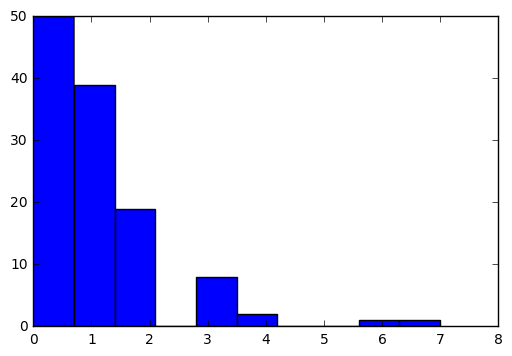

In [34]:
import matplotlib.pyplot as plt
plt.hist(df_16['FTAG'])
plt.show()

In [23]:
def facto(n):
    return{
        0:1,
        1:1,
        2:2,
        3:6,
        4:24,
        5:120,
        6:720,
        7:5040,
        8:40320,
        9:362880,
        10:3628800
    }[n]


In [300]:
rau=0

def tau(x,y,lam,mu,rau): #fonction tau 
    if x<2 and y<2:
        return {
            (0,0): 1-lam*mu*rau,
            (0,1): 1+lam*rau,
            (1,0): 1+mu*rau,
            (1,1): 1-rau,

        }[(x,y)]
    else:
        return 1

def distribution(x,y,a,b,gamma,rau): #distribution de proba definie dans l'article
    lam=a[0]*b[1]*gamma
    mu=a[1]*b[0]
    return tau(x,y,lam,mu,rau)*lam**x*np.exp(-lam)*mu**y*np.exp(-mu)/facto(x)/facto(y)

distribution(1,2,[1,1],[1,1],1,0)

0.067667641618306351

In [301]:
teams=df_16['HomeTeam'].unique()
np.where(teams=='Lyon')[0][0]

a=np.full(20,1.)
b=np.full(20,0.5)

In [302]:
def match_log_likelihood(x,a,b,gamma,rau,teams): #x is the row of a match
    home_index=np.where(teams==x['HomeTeam'])[0][0]
    away_index=np.where(teams==x['AwayTeam'])[0][0]
    return np.log(distribution(x['FTHG'],x['FTAG'],[a[home_index],a[away_index]],[b[home_index],b[away_index]],gamma,rau))

In [303]:
match_log_likelihood(df_16.iloc[3],a,b,1.,0.,teams)

-6.9506425525877269

In [304]:
def log_likelihood(df,a,b,gamma,rau): #somme des log likelihood 
    teams=df['HomeTeam'].unique()
    return np.sum([match_log_likelihood(df.iloc[i],a,b,gamma,rau,teams) for i in range(len(df))])

df=df_15
teams=df['HomeTeam'].unique()
x=np.full(2*len(teams)+2,1.)
x[-1]=0

def fun_to_minimize(x):  #function a minimiser
    #x is the vector to optimize. It is of size 2n+2 where 1 is the number of teams
    #It contains a, b, gamma, rau
    N=len(x)
    n=int((N-2)/2)
    a=x[:n]
    b=x[n:2*n]
    gamma=1 #x[2*n]
    rau=0 #x[2*n+1]
    return -log_likelihood(df,a,b,gamma,rau)

In [305]:
fun_to_minimize(x)


1152.632753626347

In [235]:
from scipy.optimize import minimize

#contraintes je ne les ai pas toutes ecrites
cons = ({'type': 'eq',
          'fun' : lambda x: np.sum(x[:int((len(x)-2)/2)])-int((len(x)-2)/2)},
        {'type': 'eq',
          'fun' : lambda x: np.sum(x[int((len(x)-2)/2):(len(x)-2)]-int((len(x)-2)/2))}
       )
        
         
res = minimize(fun_to_minimize, x, #ca prend du temps et ca converge pas
               constraints=cons)

In [248]:
teams[np.argmax(res.x[:20])]

'Paris SG'

In [244]:
teams[np.argmin(res.x[:20])]

'Troyes'

In [325]:
a=res.x[:20]
b=res.x[20:40]
gamma=res.x[40]
distribution(0,0,[a[0],a[1]],[b[0],b[1]],gamma,0)

0.85908585616915811

In [334]:
def probas(home,away):
    a=res.x[:20]*10
    b=res.x[20:40]*10
    gamma=res.x[40]
    rau=res.x[41]
    home_index=np.where(teams==home)[0][0]
    away_index=np.where(teams==away)[0][0]
    draw_pr=np.sum([distribution(i,i,[a[home_index],a[away_index]],[b[home_index],b[away_index]],gamma,rau) for i in range(0,10)])
    home_pr=0
    for i in range(0,10):
        j=0
        while j<i:
            home_pr+=distribution(i,j,[a[home_index],a[away_index]],[b[home_index],b[away_index]],gamma,rau)
            j+=1
    away_pr=0
    for j in range(0,10):
        i=0
        while i<j:
            away_pr+=distribution(i,j,[a[home_index],a[away_index]],[b[home_index],b[away_index]],gamma,rau)
            i+=1     
    return(home_pr,draw_pr,away_pr)


0.45238095238095238